In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv",encoding="utf-8")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [24]:
data["Family"] = data["SibSp"] + data["Parch"] + 1

C:\Users\hi\AppData\Local\Temp\ipykernel_14620\527495500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Family"] = data["SibSp"] + data["Parch"] + 1


In [25]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,20s,1,0,S,2
1,1,1,female,30s,1,0,C,2
2,1,3,female,20s,0,0,S,1
3,1,1,female,30s,1,0,S,2
4,0,3,male,30s,0,0,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,20s,0,0,S,1
887,1,1,female,10s,0,0,S,1
888,0,3,female,None,1,2,S,4
889,1,1,male,20s,0,0,C,1


In [30]:
data = pd.get_dummies(data,drop_first=True)

In [10]:
def age_dist(i):
        if 0 < i < 10:
            return 'under10s'
        elif 10 <= i < 20:
            return '10s'
        elif 20<= i < 30:
            return '20s'
        elif 30 <= i < 40:
            return '30s'
        elif 40<= i < 50 :
            return '40s'
        elif 50 <= i < 60:
            return '50s'
        elif 60<= i < 70:
            return '60s'
        elif 70<= i <80:
            return '70s'
        elif 80<= i < 90:
            return '80s'
        

In [12]:
data['Age']  = data['Age'].apply(age_dist)

In [31]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [33]:
dtc = DecisionTreeClassifier(max_depth=3,random_state=7)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

print(accuracy_score(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6,n_jobs=-1 ,criterion="entropy",n_estimators=1000,random_state=10)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)


print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.7653631284916201
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       110
           1       0.73      0.62      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



## tensorflow Sequentail API를 사용한 순차적 모델 

In [35]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [36]:
model = Sequential() 
model.add(Dense(30,input_dim=X_train.shape[1],activation='relu')) #input_dim : 독립변수의 컬럼수 X : 입력 
model.add(Dense(60,activation='relu')) # 은닉층1 
model.add(Dense(30,activation='relu')) # 은닉층 2 
model.add(Dense(15,activation='relu')) # 은닉층1 
model.add(Dense(1,activation='sigmoid')) # 출력층 sigmoid 이진 분류

In [39]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                480       
                                                                 
 dense_11 (Dense)            (None, 60)                1860      
                                                                 
 dense_12 (Dense)            (None, 30)                1830      
                                                                 
 dense_13 (Dense)            (None, 15)                465       
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 4,651
Trainable params: 4,651
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train,y_train,epochs=200,batch_size=20,validation_data=(X_test,y_test))

Epoch 1/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.8806 - val_loss: 1.0112 - val_accuracy: 0.7374
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8764 - val_loss: 0.9677 - val_accuracy: 0.7318
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8820 - val_loss: 1.0809 - val_accuracy: 0.7263
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.8820 - val_loss: 1.0995 - val_accuracy: 0.7207
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8848 - val_loss: 1.0046 - val_accuracy: 0.7207
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8848 - val_loss: 1.0383 - val_accuracy: 0.7151
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.8848 - val_loss: 1.0417 - val_accuracy: 0.7430
Epoch 8/200
3

Epoch 59/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.8834 - val_loss: 1.1169 - val_accuracy: 0.7318
Epoch 60/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8848 - val_loss: 1.1299 - val_accuracy: 0.7318
Epoch 61/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8876 - val_loss: 1.1771 - val_accuracy: 0.7486
Epoch 62/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8820 - val_loss: 1.3258 - val_accuracy: 0.7430
Epoch 63/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8834 - val_loss: 1.1194 - val_accuracy: 0.7318
Epoch 64/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8919 - val_loss: 1.1628 - val_accuracy: 0.7486
Epoch 65/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.8876 - val_loss: 1.1691 - val_accuracy: 0.7486
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.8862 - val_loss: 1.2540 - val_accuracy: 0.7430
Epoch 174/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8848 - val_loss: 1.2770 - val_accuracy: 0.7430
Epoch 175/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.8834 - val_loss: 1.2716 - val_accuracy: 0.7374
Epoch 176/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.8848 - val_loss: 1.2484 - val_accuracy: 0.7374
Epoch 177/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8862 - val_loss: 1.2072 - val_accuracy: 0.7374
Epoch 178/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.8848 - val_loss: 1.2540 - val_accuracy: 0.7151
Epoch 179/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8834 - val_loss: 1.2507 - val_accuracy: 0.7318
Epoch 180/200

## 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 정확성을 보는 지표는 loss 
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음
* 두 지표간 차이가 있을 경우 loss가 낮은 모델이 우수한 모델 

In [51]:
score = model.evaluate(X_test,y_test)
print('test loss:',score[0])
print('test accuracy:',score[1])

6/6 [==============================] - 0s 1ms/step - loss: 1.2931 - accuracy: 0.7207
test loss: 1.2931140661239624
test accuracy: 0.7206704020500183


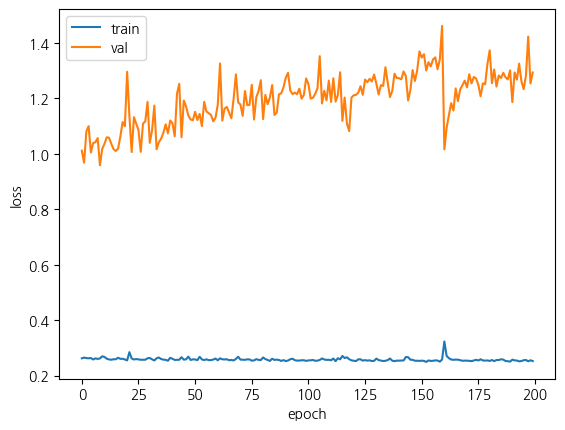

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [53]:
pred = model.predict(X_test)
print(pred.shape)

6/6 [==============================] - 0s 2ms/step
(179, 1)


In [54]:
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x>= 0.5 else 0)

In [55]:
pred

0      0
1      0
2      0
3      0
4      1
      ..
174    1
175    1
176    0
177    0
178    1
Name: 0, Length: 179, dtype: int64

In [56]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7206703910614525
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       110
           1       0.66      0.58      0.62        69

    accuracy                           0.72       179
   macro avg       0.70      0.69      0.70       179
weighted avg       0.72      0.72      0.72       179



## Tensorflow Functional API를 이용한 함수형 모델 
* Sequential API는 단순히 층을 여러개 쌓는 형태라 복잡한 형태의 모델 생성에 한계가 있음.
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(munti-input), 다중 출력(multi-output)등 복잡한 모델을 정의할 수 있음. 
* input(shape=(독립변수 수 , )) 로 입력층 정의 
* 이전 층을 다음 층의 입력으로 사용 
* model()에 입력과 출력 정의

In [57]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model 

In [60]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 (컬럼(특성),Feature 14개를 입력으로 받음) 
x = Dense(30,activation='relu')(inputs) # 은닉층 1번
x = Dense(60,activation='relu')(x) # 은닉층 2번 ※ 설명에서 나온 것 처럼 이전층을 다음층으로 써야하니 x로 넣어줘야함
x =  Dense(15,activation='relu')(x)  # 은닉층 3번 
x =  Dense(1,activation='sigmoid')(x)  # 출력층 

model = Model(inputs,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_15 (Dense)            (None, 30)                480       
                                                                 
 dense_16 (Dense)            (None, 60)                1860      
                                                                 
 dense_17 (Dense)            (None, 15)                915       
                                                                 
 dense_18 (Dense)            (None, 1)                 16        
                                                                 
Total params: 3,271
Trainable params: 3,271
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=400,batch_size=100, validation_data = (X_test,y_test))
score = model.evaluate(X_test,y_test)

print('test_loss: ',score[0])
print('test_accuracy',score[1])

pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x>= 0.5 else 0)

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Epoch 1/400
8/8 [==============================] - 1s 23ms/step - loss: 0.2627 - accuracy: 0.8834 - val_loss: 0.9906 - val_accuracy: 0.7542
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.8862 - val_loss: 0.9934 - val_accuracy: 0.7709
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.8904 - val_loss: 0.9785 - val_accuracy: 0.7430
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2571 - accuracy: 0.8834 - val_loss: 0.9918 - val_accuracy: 0.7318
Epoch 5/400
8/8 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.8764 - val_loss: 0.9860 - val_accuracy: 0.7318
Epoch 6/400
8/8 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.8890 - val_loss: 0.9703 - val_accuracy: 0.7318
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2507 - accuracy: 0.8904 - val_loss: 0.9711 - val_accuracy: 0.7486
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.8933 - val_loss: 1.0378 - val_accuracy: 0.7374
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.8834 - val_loss: 1.0246 - val_accuracy: 0.7318
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.8919 - val_loss: 1.0385 - val_accuracy: 0.7486
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.8904 - val_loss: 1.0208 - val_accuracy: 0.7318
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.8848 - val_loss: 1.0608 - val_accuracy: 0.7542
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2521 - accuracy: 0.8862 - val_loss: 1.0630 - val_accuracy: 0.7318
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2594 - accuracy: 0.8890 - val_loss: 1.0541 - val_accuracy: 0.7542
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.8904 - val_loss: 1.0262 - val_accuracy: 0.7318
Epoch 234/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.8876 - val_loss: 1.0202 - val_accuracy: 0.7374
Epoch 235/400
8/8 [==============================] - 0s 4ms/step - loss: 0.2504 - accuracy: 0.8904 - val_loss: 1.0289 - val_accuracy: 0.7542
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.8862 - val_loss: 1.0199 - val_accuracy: 0.7486
Epoch 237/400
8/8 [==============================] - 0s 4ms/step - loss: 0.2515 - accuracy: 0.8876 - val_loss: 1.0136 - val_accuracy: 0.7542
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.8876 - val_loss: 1.0188 - val_accuracy: 0.7318
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.8890 - val_loss: 1.0276 - val_accuracy: 0.7486
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.8848 - val_loss: 1.0756 - val_accuracy: 0.7263
Epoch 350/400
8/8 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.8834 - val_loss: 1.0641 - val_accuracy: 0.7374
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.8862 - val_loss: 1.0570 - val_accuracy: 0.7318
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.8904 - val_loss: 1.0545 - val_accuracy: 0.7263
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.8890 - val_loss: 1.0831 - val_accuracy: 0.7318
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.8806 - val_loss: 1.0905 - val_accuracy: 0.7318
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.8848 - val_loss: 1.0460 - val_accuracy: 0.7318
Epoch 356/400
8/8 [========

In [63]:
pred

,0
0,0.061968
1,0.028902
2,0.223255
3,0.061296
4,0.999074
...,...
174,0.999989
175,0.999804
176,0.069140
177,0.040877


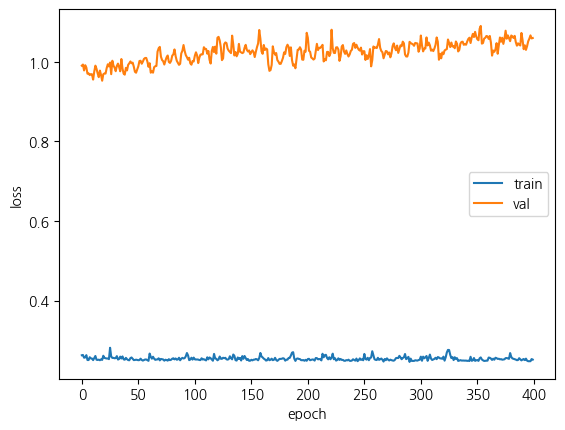

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법 
* tf.keras.Model을 상속 받아 작성한다.

In [69]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic,self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation="relu")
        self.dense2 = tf.keras.layers.Dense(60, activation="relu")
        self.dense3 = tf.keras.layers.Dense(15, activation="relu")
        self.classifier = tf.keras.layers.Dense(1, activation="sigmoid")
        
    def call(self,inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [70]:
model = Titanic()

Epoch 1/400
8/8 [==============================] - 1s 29ms/step - loss: 0.6893 - accuracy: 0.5112 - val_loss: 0.6459 - val_accuracy: 0.6145
Epoch 2/400
8/8 [==============================] - 0s 7ms/step - loss: 0.6379 - accuracy: 0.6152 - val_loss: 0.6228 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 0.6091 - accuracy: 0.6166 - val_loss: 0.6145 - val_accuracy: 0.6145
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5883 - accuracy: 0.6489 - val_loss: 0.6107 - val_accuracy: 0.6425
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5672 - accuracy: 0.7022 - val_loss: 0.6051 - val_accuracy: 0.6536
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.7163 - val_loss: 0.5989 - val_accuracy: 0.6816
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5341 - accuracy: 0.7500 - val_loss: 0.5963 - val_accuracy: 0.6872
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.3366 - accuracy: 0.8680 - val_loss: 0.5559 - val_accuracy: 0.7598
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3309 - accuracy: 0.8567 - val_loss: 0.5495 - val_accuracy: 0.7598
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3315 - accuracy: 0.8666 - val_loss: 0.5524 - val_accuracy: 0.7654
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.8736 - val_loss: 0.5521 - val_accuracy: 0.7654
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8666 - val_loss: 0.5533 - val_accuracy: 0.7654
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.8666 - val_loss: 0.5514 - val_accuracy: 0.7654
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8694 - val_loss: 0.5736 - val_accuracy: 0.7654
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.8820 - val_loss: 0.6619 - val_accuracy: 0.7374
Epoch 234/400
8/8 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.8750 - val_loss: 0.6785 - val_accuracy: 0.7263
Epoch 235/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.8750 - val_loss: 0.6788 - val_accuracy: 0.7263
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2832 - accuracy: 0.8820 - val_loss: 0.6842 - val_accuracy: 0.7263
Epoch 237/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.8806 - val_loss: 0.6910 - val_accuracy: 0.7095
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2841 - accuracy: 0.8750 - val_loss: 0.6714 - val_accuracy: 0.7430
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.8750 - val_loss: 0.6481 - val_accuracy: 0.7374
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.8778 - val_loss: 0.7669 - val_accuracy: 0.7151
Epoch 350/400
8/8 [==============================] - 0s 7ms/step - loss: 0.2770 - accuracy: 0.8708 - val_loss: 0.7442 - val_accuracy: 0.7263
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2777 - accuracy: 0.8834 - val_loss: 0.7762 - val_accuracy: 0.7318
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.8736 - val_loss: 0.8394 - val_accuracy: 0.7318
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.8876 - val_loss: 0.8066 - val_accuracy: 0.7039
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.8876 - val_loss: 0.8155 - val_accuracy: 0.7318
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.8876 - val_loss: 0.7882 - val_accuracy: 0.7207
Epoch 356/400
8/8 [========

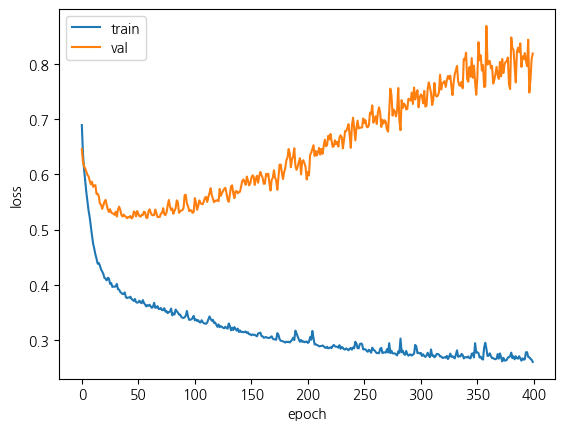

In [72]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=400,batch_size=100, validation_data = (X_test,y_test))
score = model.evaluate(X_test,y_test)

print('test_loss: ',score[0])
print('test_accuracy',score[1])

pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x>= 0.5 else 0)

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()